## Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import statsmodels.api as sm
import datetime

## Open Data

In [7]:
#Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv')

## Filtering the top 6

In [9]:
data_dir1 = data_day.loc[data_day['direction1'] > 0]
liste_especes = data_dir1[data_dir1['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
n_obs_species_year.rename(columns={'species':'Espèces','year':'Année', 'direction1': 'Effectif total'}, inplace=True)
n_obs_species_year['Effectif total'] = n_obs_species_year['Effectif total'] .astype(int)

n_obs_species_year.to_csv('../figures/top_especes_rapaces_cigognes/somme_effectif_par_an/somme_effectif_par_an_top_6.csv', index = False)
n_obs_species_year.head(5)

,Espèces,Année,Effectif total
0,Bondrée apivore,2016,4517
1,Bondrée apivore,2017,4907
2,Bondrée apivore,2018,6232
3,Bondrée apivore,2019,5546
4,Bondrée apivore,2020,5229


## Plots effectifs annuels top 6 entre 2016 et 2023 

In [10]:
# Define a color palette for the species
species_colors = {
    'Bondrée apivore': 'red',
    'Cigogne blanche': 'blue',
    'Cigogne noire': 'green',
    'Milan noir': 'violet',
    'Milan royal': 'orange',
    'Épervier d’Europe' : 'yellow'
}

### Effectif annuel du milan noir entre 2016 et 2023

In [20]:
milan_noir_effectif_par_an = n_obs_species_year[n_obs_species_year['Espèces'].isin(['Milan noir'])]

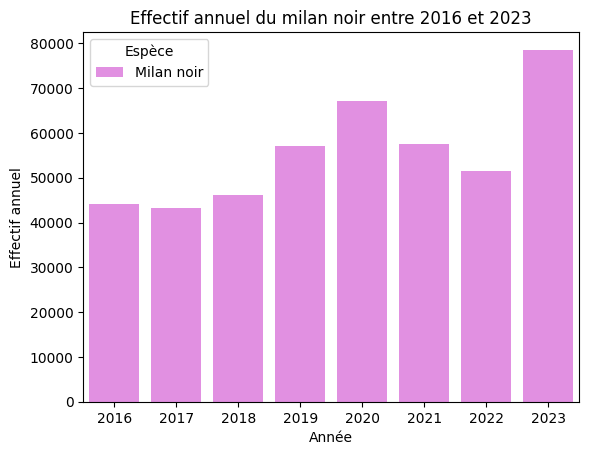

In [22]:
fig, ax = plt.subplots()

sns.barplot(data=milan_noir_effectif_par_an,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel du milan noir entre 2016 et 2023", fontsize=12);
plt.legend(title='Espèce', prop={'size': 10})

plt.savefig('../figures/top_especes_rapaces_cigognes/somme_effectif_par_an/somme_effectif_par_an_milan_noir.png')

### Effectif annuel top 6 observées entre 2016 et 2023

<Figure size 2000x1500 with 0 Axes>

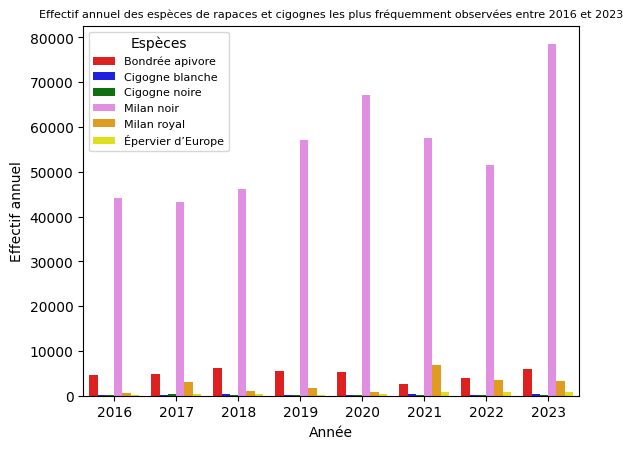

In [12]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=n_obs_species_year,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel des espèces de rapaces et cigognes les plus fréquemment observées entre 2016 et 2023", fontsize=8);
plt.legend(title='Espèces', prop={'size': 8})

plt.savefig('../figures/top_especes_rapaces_cigognes/somme_effectif_par_an/somme_effectif_par_an_zoom_0.png')

### Effectif annuel top 6 sans milan noir observées entre 2016 et 2023 

In [13]:
liste_especes_sans_MN = n_obs_species_year[n_obs_species_year['Espèces'].isin(['Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]

<Figure size 2000x1500 with 0 Axes>

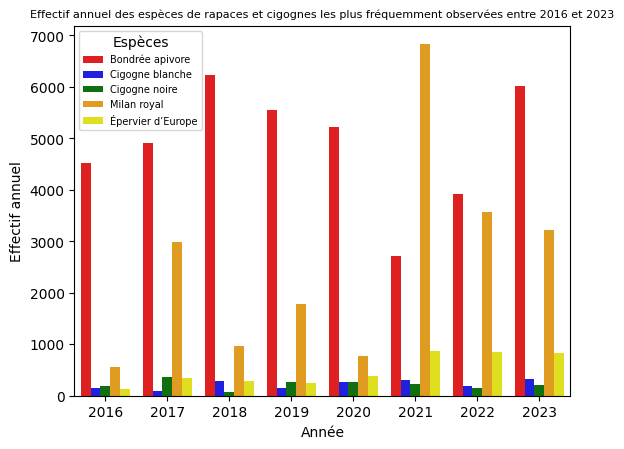

In [17]:
plt.figure(figsize=(20,15));

fig, ax = plt.subplots();

sns.barplot(data=liste_especes_sans_MN,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel des espèces de rapaces et cigognes les plus fréquemment observées entre 2016 et 2023", fontsize=8);
plt.legend(title='Espèces', prop={'size': 7});

plt.savefig('../figures/top_especes_rapaces_cigognes/somme_effectif_par_an/somme_effectif_par_an_zoom_1.png');

### Effectif annuel top 6 sans milan noir, milan royal et bondrée apivore observées entre 2016 et 2023

In [18]:
liste_especes_sans_MN_BA_MR = n_obs_species_year[n_obs_species_year['Espèces'].isin(['Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]

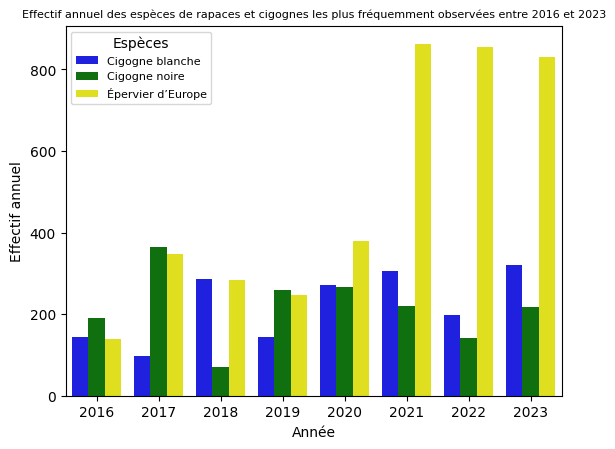

In [19]:
fig, ax = plt.subplots()

sns.barplot(data=liste_especes_sans_MN_BA_MR,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel des espèces de rapaces et cigognes les plus fréquemment observées entre 2016 et 2023", fontsize=8);
plt.legend(title='Espèces', prop={'size': 8})

plt.savefig('../figures/top_especes_rapaces_cigognes/somme_effectif_par_an/somme_effectif_par_an_zoom_2.png')

### Effectif annuel du milan royal et de la bondrée apivore entre 2016 et 2023

In [23]:
milan_royal_bondree_effectif_par_an = n_obs_species_year[n_obs_species_year['Espèces'].isin(['Milan royal', 'Bondrée apivore'])]

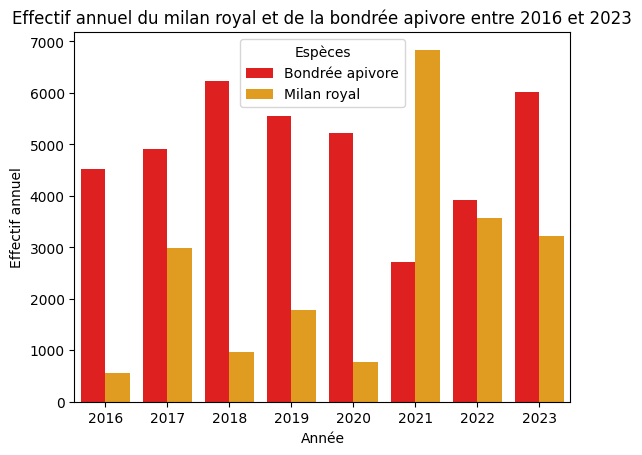

In [24]:
fig, ax = plt.subplots()

sns.barplot(data=milan_royal_bondree_effectif_par_an,
            x='Année',
            y='Effectif total',
            hue='Espèces',
            palette=species_colors).set(xlabel ="Année", ylabel = "Effectif annuel");

plt.title("Effectif annuel du milan royal et de la bondrée apivore entre 2016 et 2023", fontsize=12);
plt.legend(title='Espèces', prop={'size': 10})

plt.savefig('../figures/top_especes_rapaces_cigognes/somme_effectif_par_an/somme_effectif_par_an_milan_royal_bondree_apivore.png')